<a href="https://colab.research.google.com/github/26112/CODEC-TECHNOLOGIES-PROJECTS-/blob/main/PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Stock Price Predictor

   Develop a model that predicts stock prices based on historical data.
   
   Use linear regression or more advanced techniques if desired.  

In [ ]:
!pip install yfinance
!pip install scikit-learn
!pip install matplotlib
!pip install tensorflow

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Download historical stock data for a company (e.g., Apple)
df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
df = df[['Close']]  # We only use the closing price
df.dropna(inplace=True)
df.tail()

/tmp/ipython-input-3-1873496099.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2024-12-23,254.655716
2024-12-24,257.578674
2024-12-26,258.396667
2024-12-27,254.974930
2024-12-30,251.593094


In [ ]:
# Create a new column with shifted prices (next day)
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

X = df[['Close']].values
y = df['Target'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predicted = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, predicted)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 6.49


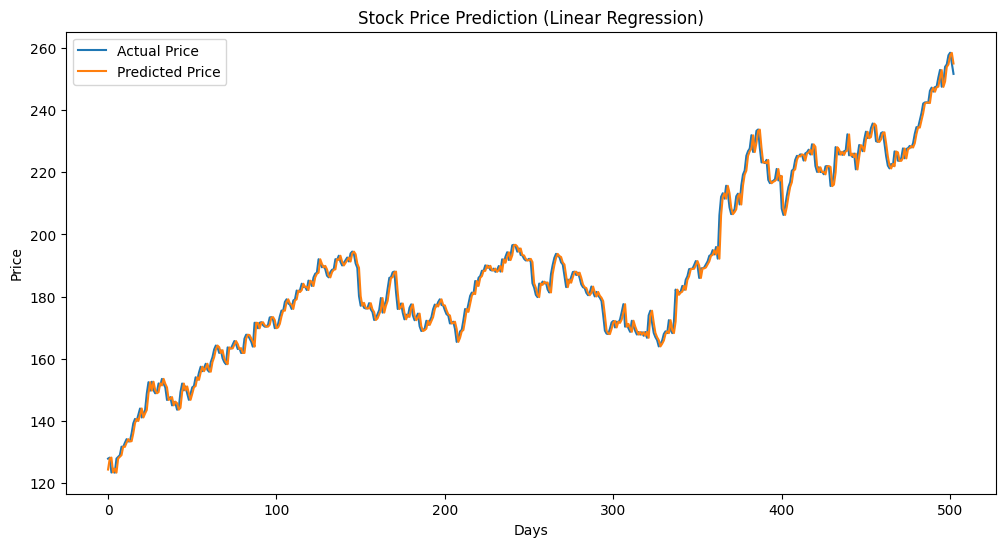

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(predicted, label='Predicted Price')
plt.title('Stock Price Prediction (Linear Regression)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0212
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.9246e-04
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.7909e-04
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 3.1985e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 2.5705e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 2.3991e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 2.6142e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 2.6165e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 2.1119e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 2.5029e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


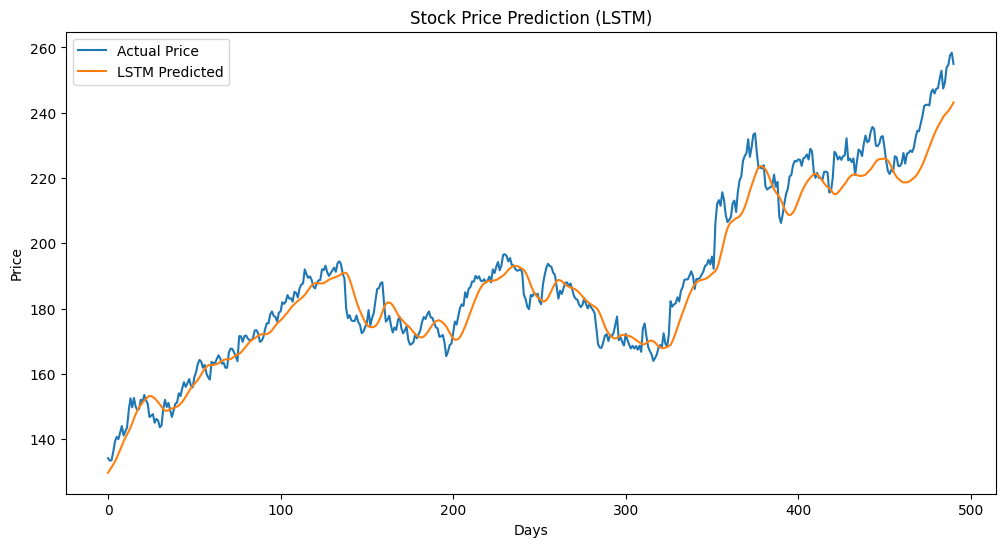

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Prepare LSTM sequences
sequence_length = 60
X_lstm, y_lstm = [], []
for i in range(sequence_length, len(scaled_data)):
    X_lstm.append(scaled_data[i-sequence_length:i, 0])
    y_lstm.append(scaled_data[i, 0])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Split
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]

# Build LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict and inverse scale
predicted_lstm = lstm_model.predict(X_test)
predicted_lstm = scaler.inverse_transform(predicted_lstm.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot LSTM results
plt.figure(figsize=(12, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_lstm, label='LSTM Predicted')
plt.title('Stock Price Prediction (LSTM)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


# Stock Price Predictor

This project demonstrates how to predict stock prices using both Linear Regression and Long Short-Term Memory (LSTM) neural networks. It utilizes historical stock data to train models and forecast future prices.

## Table of Contents

- [Introduction](#introduction)
- [Prerequisites](#prerequisites)
- [Installation](#installation)
- [Usage](#usage)
- [Models](#models)
- [Data Source](#data-source)
- [Results](#results)

## Introduction

Stock price prediction is a challenging task due to the volatile nature of financial markets. This project explores two different approaches: a simple Linear Regression model and a more complex LSTM neural network, to predict the closing price of a stock based on its historical data.

## Prerequisites

Make sure you have the following installed:

*   Python 3.7+
*   Jupyter Notebook or Google Colab

## Installation

The project requires several Python libraries. You can install them using pip:

```

cell_type: markdown

## Usage

1.  **Clone the repository:**

3. **Run the notebook:** Open and run the `stock_price_predictor.ipynb` notebook in Jupyter Notebook or Google Colab.

## Models

This project implements two models for stock price prediction:

1.  **Linear Regression:** A simple linear model predicting the next day's closing price based on the current day's closing price.
2.  **LSTM (Long Short-Term Memory):** A type of recurrent neural network (RNN) well-suited for sequence data like time series. This model uses a sequence of historical closing prices to predict the next closing price.

## Data Source

The historical stock data is downloaded using the `yfinance` library. By default, the notebook downloads data for Apple (`AAPL`), but you can easily modify the code to use a different stock ticker.

## Results

The notebook will output the Mean Squared Error (MSE) for the Linear Regression model and plot the actual versus predicted prices for both models, allowing you to compare their performance.